In [9]:
from dataset import AngioDataset
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from unet import UNet
from run_training import run_training
from torch.utils.tensorboard import SummaryWriter
from metric import DiceCoefficient

uint16 (1, 128, 128)
uint16 (1, 128, 128)
<class 'torch.Tensor'>
torch.Size([1, 128, 128])


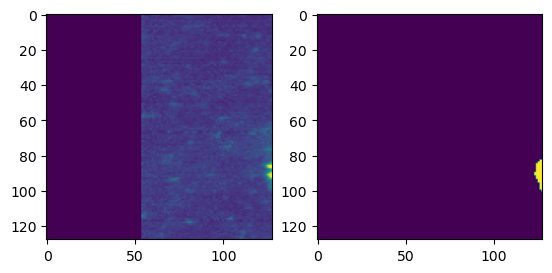

In [4]:
train_filepath = "train"
train_dataset = AngioDataset(train_filepath,patch_size=[1, 128, 128])

train_dataset_raw = train_dataset[0][0]
train_dataset_mask = train_dataset[0][1]

print(type(train_dataset_raw))
print(train_dataset_raw.shape)

fig, ax = plt.subplots(1,2)

ax[0].imshow(train_dataset_raw[0,:,:])
ax[1].imshow(train_dataset_mask[0,:,:])


In [5]:
val_filepath = "val"
val_dataset = AngioDataset(val_filepath,patch_size=[1, 128, 128])
print(len(val_dataset))



3


In [6]:
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=10)


In [7]:
device = torch.device("cuda") if torch.cuda.is_available else torch.device("cpu")

In [10]:
model = UNet(in_channels=1, out_channels=1, depth=4).to(device)
loss_function = nn.MSELoss()
lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

n_epochs = 5
dice = DiceCoefficient()
logger = SummaryWriter("runs")
log_interval=1


In [49]:
run_training(model, optimizer, dice, n_epochs,
             train_loader, val_loader, loss_function, log_interval, logger, device=device)

RuntimeError: GET was unable to find an engine to execute this computation